In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Case Study 1(Cervical Cancer Risk Classification)    
    
   
    Age
    Number of sexual partners
    First sexual intercourse
    Num of pregnancies
    Smokes
    Smokes (years)
    Smokes (packs/year)
    Hormonal Contraceptives
    Hormonal Contraceptives (years)
    IUD
    IUD (years)
    STDs
    STDs (number)
    STDs:condylomatosis
    STDs:cervical condylomatosis
    STDs:vaginal condylomatosis
    STDs:vulvo-perineal condylomatosis
    STDs:syphilis
    STDs:pelvic inflammatory disease
    STDs:genital herpes
    STDs:molluscum contagiosum
    STDs:AIDS
    STDs:HIV
    STDs:Hepatitis B
    STDs:HPV
    STDs: Number of diagnosis
    STDs: Time since first diagnosis
    STDs: Time since last diagnosis
    Dx:Cancer
    Dx:CIN
    Dx:HPV
    Dx
    Hinselmann
    Schiller
    Citology
    Biopsy

### 1.1 Import the necessary librairies

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Import  the  dataset in  pandas dataframe

In [29]:
df=pd.read_csv("/content/drive/MyDrive/PGDSE/EDA/LAB/TAKE_HOME/DAY 4/kag_risk_factors_cervical_cancer.csv")
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


### 1.3 check  data.describe()

In [30]:
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 1.4 Replacing "?" with null values in each column?


In [31]:
df.replace('?',np.nan,inplace=True)
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0


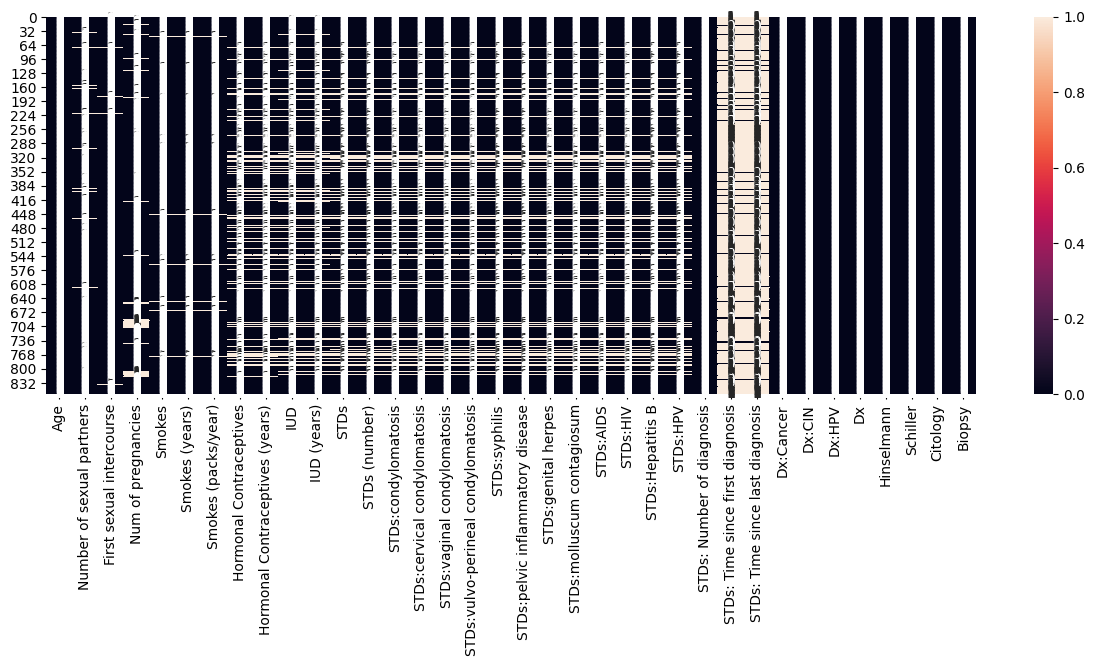

In [32]:
plt.figure(figsize=(15,5),dpi=100)
sns.heatmap(df.isnull(),annot=True)

In [33]:
df.isnull().sum()/len(df)*100

Age                                    0.000000
Number of sexual partners              3.030303
First sexual intercourse               0.815851
Num of pregnancies                     6.526807
Smokes                                 1.515152
Smokes (years)                         1.515152
Smokes (packs/year)                    1.515152
Hormonal Contraceptives               12.587413
Hormonal Contraceptives (years)       12.587413
IUD                                   13.636364
IUD (years)                           13.636364
STDs                                  12.237762
STDs (number)                         12.237762
STDs:condylomatosis                   12.237762
STDs:cervical condylomatosis          12.237762
STDs:vaginal condylomatosis           12.237762
STDs:vulvo-perineal condylomatosis    12.237762
STDs:syphilis                         12.237762
STDs:pelvic inflammatory disease      12.237762
STDs:genital herpes                   12.237762
STDs:molluscum contagiosum            12

In [34]:
print('Change of datatypes for necessary columns: ')
df=df.astype({'Number of sexual partners': 'float64','First sexual intercourse':'float64',
                           'Num of pregnancies':'float64','Smokes (years)':'float64','Smokes (packs/year)':'float64',
                           'Hormonal Contraceptives (years)':'float64','IUD (years)':'float64','STDs (number)':'float64',
                            'Dx:Cancer':'object','Dx:CIN':'object','Dx:HPV':'object','Dx':'object','Hinselmann':'object',
                            'Schiller':'object','Citology':'object','Biopsy':'object'})
df.dtypes

Change of datatypes for necessary columns: 


Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                 object
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives                object
Hormonal Contraceptives (years)       float64
IUD                                    object
IUD (years)                           float64
STDs                                   object
STDs (number)                         float64
STDs:condylomatosis                    object
STDs:cervical condylomatosis           object
STDs:vaginal condylomatosis            object
STDs:vulvo-perineal condylomatosis     object
STDs:syphilis                          object
STDs:pelvic inflammatory disease       object
STDs:genital herpes                    object
STDs:molluscum contagiosum             object
STDs:AIDS                         

### 1.5 Check the count of Biopsy


In [35]:
df['Biopsy'].value_counts()

0    803
1     55
Name: Biopsy, dtype: int64

### 1.6 Check the  Correlation Plot. And  write your observations?

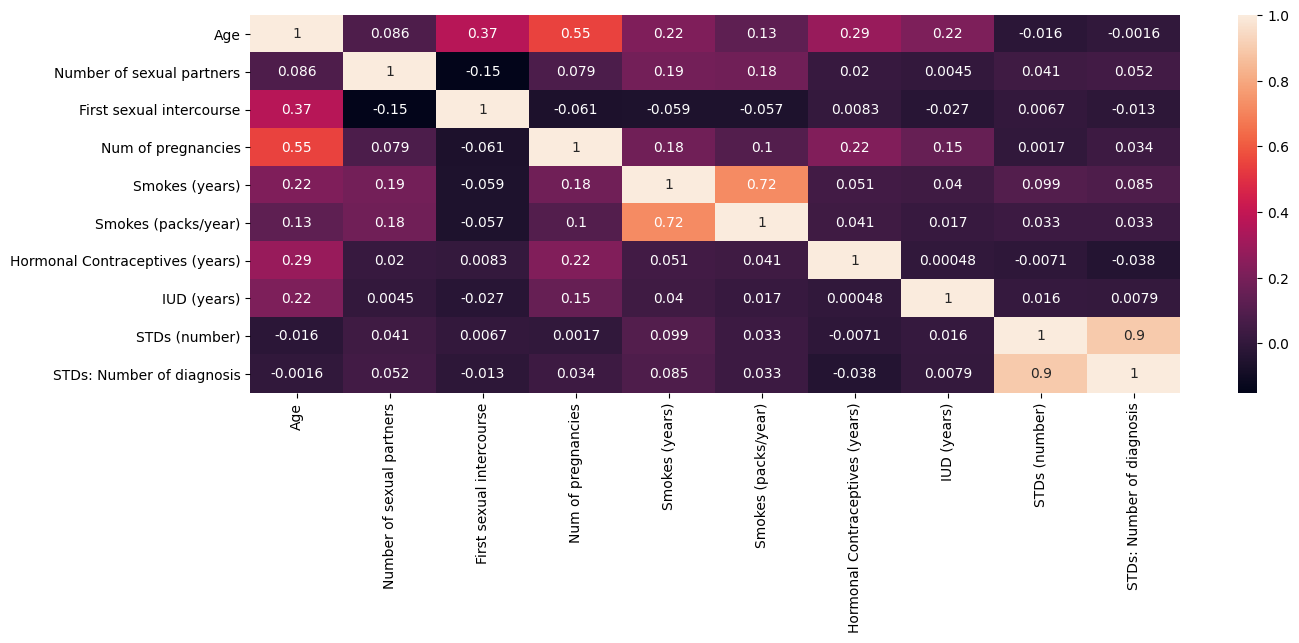

In [36]:
plt.figure(figsize=(15,5),dpi=100)
sns.heatmap(df.corr(),annot=True)

### 1.6a) Heatmap with the top 15 values 


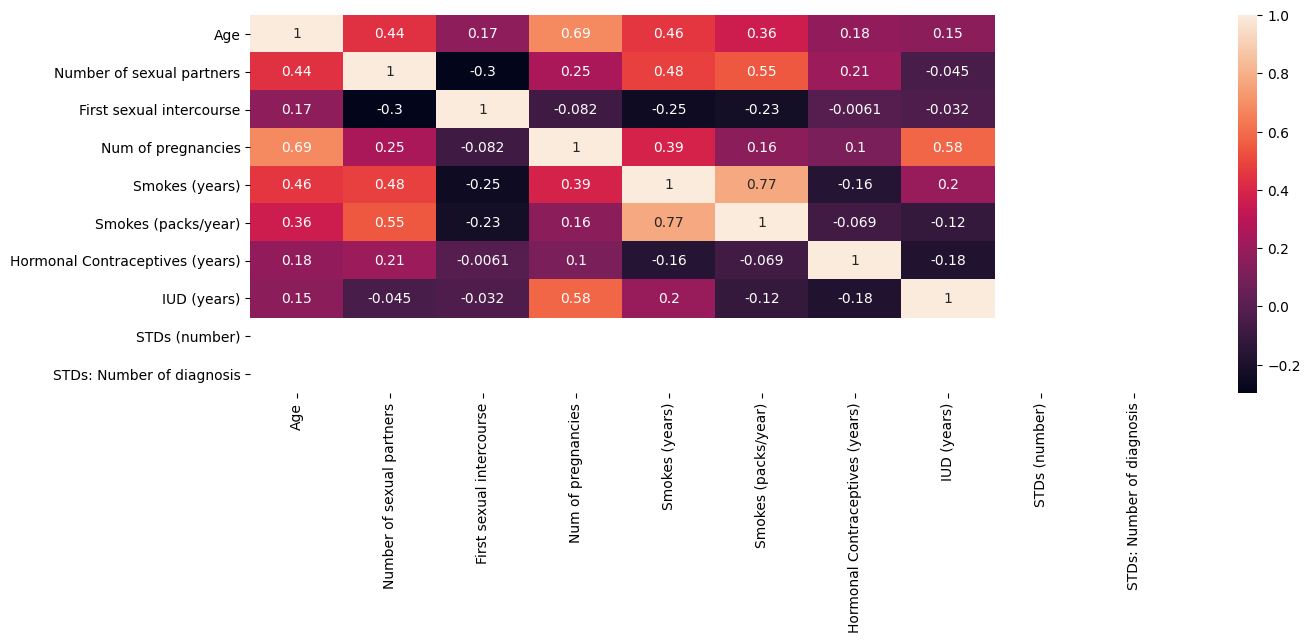

In [37]:
plt.figure(figsize=(15,5),dpi=100)
sns.heatmap(df.iloc[0:16].corr(),annot=True)

### 1.7 Imputing the missing values 

In [38]:
df.isnull().sum()/len(df)*100

Age                                    0.000000
Number of sexual partners              3.030303
First sexual intercourse               0.815851
Num of pregnancies                     6.526807
Smokes                                 1.515152
Smokes (years)                         1.515152
Smokes (packs/year)                    1.515152
Hormonal Contraceptives               12.587413
Hormonal Contraceptives (years)       12.587413
IUD                                   13.636364
IUD (years)                           13.636364
STDs                                  12.237762
STDs (number)                         12.237762
STDs:condylomatosis                   12.237762
STDs:cervical condylomatosis          12.237762
STDs:vaginal condylomatosis           12.237762
STDs:vulvo-perineal condylomatosis    12.237762
STDs:syphilis                         12.237762
STDs:pelvic inflammatory disease      12.237762
STDs:genital herpes                   12.237762
STDs:molluscum contagiosum            12

In [39]:
df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],axis=1,inplace=True)

In [40]:
df_num=df.select_dtypes(exclude='object')
df_obj=df.select_dtypes(include='object')

In [41]:
df_num.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs: Number of diagnosis'],
      dtype='object')

In [42]:
df_num.isnull().sum()/len(df)

Age                                0.000000
Number of sexual partners          0.030303
First sexual intercourse           0.008159
Num of pregnancies                 0.065268
Smokes (years)                     0.015152
Smokes (packs/year)                0.015152
Hormonal Contraceptives (years)    0.125874
IUD (years)                        0.136364
STDs (number)                      0.122378
STDs: Number of diagnosis          0.000000
dtype: float64

In [43]:
df_num['Number of sexual partners'].replace(to_replace =np.nan,value= 'mean',inplace = True)
df_num['First sexual intercourse'].replace(to_replace =np.nan,value= 'mean',inplace = True)
df_num['Num of pregnancies'].replace(to_replace =np.nan,value= 'mean',inplace = True)
df_num['Smokes (years)'].replace(to_replace =np.nan,value= 'mean',inplace = True)
df_num['Smokes (packs/year)'].replace(to_replace =np.nan,value= 'mean',inplace = True)
df_num['Hormonal Contraceptives (years)'].replace(to_replace =np.nan,value= 'mean',inplace = True)
df_num['IUD (years)'].replace(to_replace =np.nan,value= 'mean',inplace = True)
df_num['Smokes (years)'].replace(to_replace =np.nan,value= 'mean',inplace = True)
df_num['STDs (number)'].replace(to_replace =np.nan,value= 'mean',inplace = True)
df_num['STDs: Number of diagnosis'].replace(to_replace =np.nan,value= 'mean',inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [44]:
df_num.isnull().sum()/len(df)

Age                                0.0
Number of sexual partners          0.0
First sexual intercourse           0.0
Num of pregnancies                 0.0
Smokes (years)                     0.0
Smokes (packs/year)                0.0
Hormonal Contraceptives (years)    0.0
IUD (years)                        0.0
STDs (number)                      0.0
STDs: Number of diagnosis          0.0
dtype: float64

In [45]:
df_obj.columns

Index(['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs',
       'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'Dx:Cancer', 'Dx:CIN',
       'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy'],
      dtype='object')

In [46]:
df_obj.isnull().sum()/len(df)*100

Smokes                                 1.515152
Hormonal Contraceptives               12.587413
IUD                                   13.636364
STDs                                  12.237762
STDs:condylomatosis                   12.237762
STDs:cervical condylomatosis          12.237762
STDs:vaginal condylomatosis           12.237762
STDs:vulvo-perineal condylomatosis    12.237762
STDs:syphilis                         12.237762
STDs:pelvic inflammatory disease      12.237762
STDs:genital herpes                   12.237762
STDs:molluscum contagiosum            12.237762
STDs:AIDS                             12.237762
STDs:HIV                              12.237762
STDs:Hepatitis B                      12.237762
STDs:HPV                              12.237762
Dx:Cancer                              0.000000
Dx:CIN                                 0.000000
Dx:HPV                                 0.000000
Dx                                     0.000000
Hinselmann                             0

In [47]:
df_obj['Smokes']=df_obj['Smokes'].fillna(df_obj['Smokes'].mode()[0])
df_obj['Hormonal Contraceptives']=df_obj['Hormonal Contraceptives'].fillna(df_obj['Hormonal Contraceptives'].mode()[0])
df_obj['IUD']=df_obj['IUD'].fillna(df_obj['IUD'].mode()[0])
df_obj['STDs']=df_obj['STDs'].fillna(df_obj['STDs'].mode()[0])
df_obj['STDs:condylomatosis']=df_obj['STDs:condylomatosis'].fillna(df_obj['STDs:condylomatosis'].mode()[0])
df_obj['STDs:cervical condylomatosis']=df_obj['STDs:cervical condylomatosis'].fillna(df_obj['STDs:cervical condylomatosis'].mode()[0])
df_obj['STDs:vaginal condylomatosis']=df_obj['STDs:vaginal condylomatosis'].fillna(df_obj['STDs:vaginal condylomatosis'].mode()[0])
df_obj['STDs:vulvo-perineal condylomatosis']=df_obj['STDs:vulvo-perineal condylomatosis'].fillna(df_obj['STDs:vulvo-perineal condylomatosis'].mode()[0])
df_obj['STDs:syphilis']=df_obj['STDs:syphilis'].fillna(df_obj['STDs:syphilis'].mode()[0])
df_obj['STDs:pelvic inflammatory disease']=df_obj['STDs:pelvic inflammatory disease'].fillna(df_obj['STDs:pelvic inflammatory disease'].mode()[0])
df_obj['STDs:genital herpes']=df_obj['STDs:genital herpes'].fillna(df_obj['STDs:genital herpes'].mode()[0])
df_obj['STDs:molluscum contagiosum']=df_obj['STDs:molluscum contagiosum'].fillna(df_obj['STDs:molluscum contagiosum'].mode()[0])
df_obj['STDs:AIDS']=df_obj['STDs:AIDS'].fillna(df_obj['STDs:AIDS'].mode()[0])
df_obj['STDs:HIV']=df_obj['STDs:HIV'].fillna(df_obj['STDs:HIV'].mode()[0])
df_obj['STDs:Hepatitis B']=df_obj['STDs:Hepatitis B'].fillna(df_obj['STDs:Hepatitis B'].mode()[0])
df_obj['STDs:HPV']=df_obj['STDs:HPV'].fillna(df_obj['STDs:HPV'].mode()[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [48]:
df_obj.isnull().sum()/len(df)*100

Smokes                                0.0
Hormonal Contraceptives               0.0
IUD                                   0.0
STDs                                  0.0
STDs:condylomatosis                   0.0
STDs:cervical condylomatosis          0.0
STDs:vaginal condylomatosis           0.0
STDs:vulvo-perineal condylomatosis    0.0
STDs:syphilis                         0.0
STDs:pelvic inflammatory disease      0.0
STDs:genital herpes                   0.0
STDs:molluscum contagiosum            0.0
STDs:AIDS                             0.0
STDs:HIV                              0.0
STDs:Hepatitis B                      0.0
STDs:HPV                              0.0
Dx:Cancer                             0.0
Dx:CIN                                0.0
Dx:HPV                                0.0
Dx                                    0.0
Hinselmann                            0.0
Schiller                              0.0
Citology                              0.0
Biopsy                            

In [49]:
df1=pd.concat([df_num,df_obj],axis=1)
df1.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,Smokes,Hormonal Contraceptives,IUD,STDs,STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
2,34,1,mean,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
3,52,5,16,4,37,37,3,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,15,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0


###  1.8 Imputing null values for categorical variables using get_dummies

In [50]:
df_obj1=pd.get_dummies(df_obj)
df_obj1

,Smokes_0.0,Smokes_1.0,Hormonal Contraceptives_0.0,Hormonal Contraceptives_1.0,IUD_0.0,IUD_1.0,STDs_0.0,STDs_1.0,STDs:condylomatosis_0.0,STDs:condylomatosis_1.0,STDs:cervical condylomatosis_0.0,STDs:vaginal condylomatosis_0.0,STDs:vaginal condylomatosis_1.0,STDs:vulvo-perineal condylomatosis_0.0,STDs:vulvo-perineal condylomatosis_1.0,STDs:syphilis_0.0,STDs:syphilis_1.0,STDs:pelvic inflammatory disease_0.0,STDs:pelvic inflammatory disease_1.0,STDs:genital herpes_0.0,STDs:genital herpes_1.0,STDs:molluscum contagiosum_0.0,STDs:molluscum contagiosum_1.0,STDs:AIDS_0.0,STDs:HIV_0.0,STDs:HIV_1.0,STDs:Hepatitis B_0.0,STDs:Hepatitis B_1.0,STDs:HPV_0.0,STDs:HPV_1.0,Dx:Cancer_0,Dx:Cancer_1,Dx:CIN_0,Dx:CIN_1,Dx:HPV_0,Dx:HPV_1,Dx_0,Dx_1,Hinselmann_0,Hinselmann_1,Schiller_0,Schiller_1,Citology_0,Citology_1,Biopsy_0,Biopsy_1
0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
1,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
2,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
3,0,1,0,1,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0
4,1,0,0,1,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
854,1,0,0,1,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
855,1,0,0,1,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0
856,1,0,0,1,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


### 1.10 Data Visualization for categorical variables using count plot?

In [56]:
def cat(col):
    data =df[col]
    plt.figure(figsize = (9,3))
    sns.countplot(data=df,x=data)
    plt.title(col)
    plt.show()

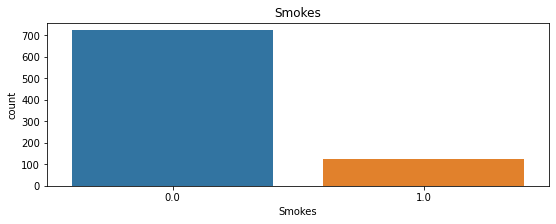

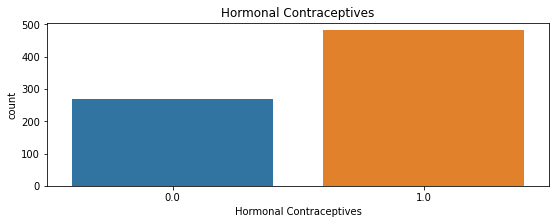

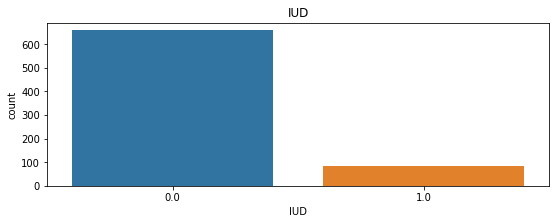

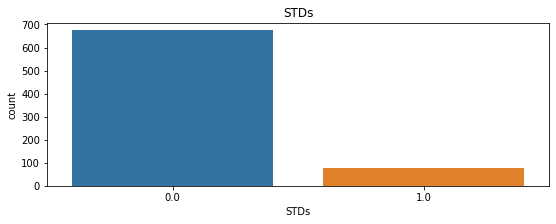

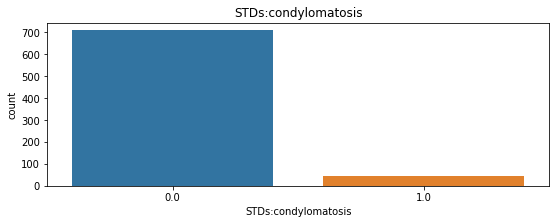

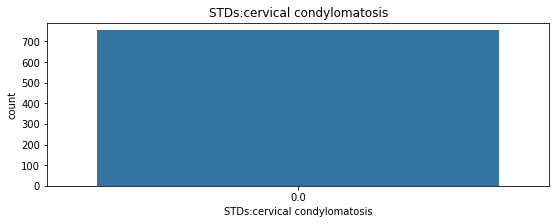

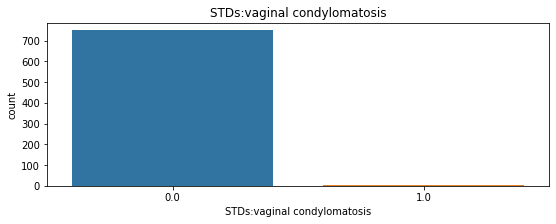

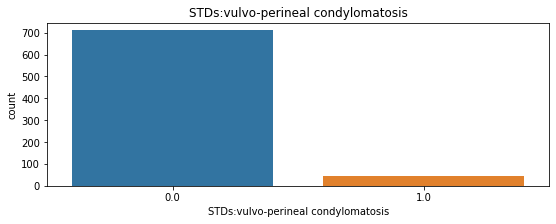

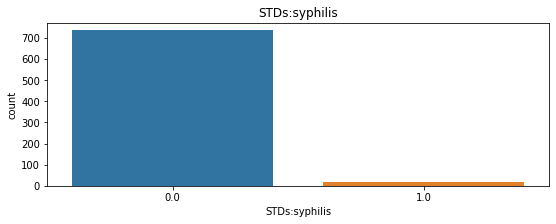

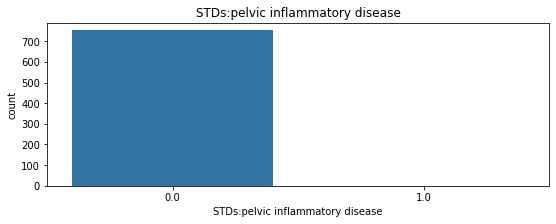

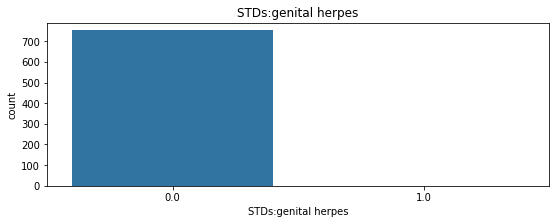

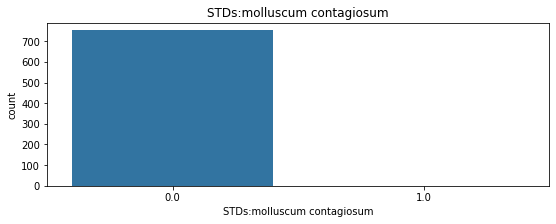

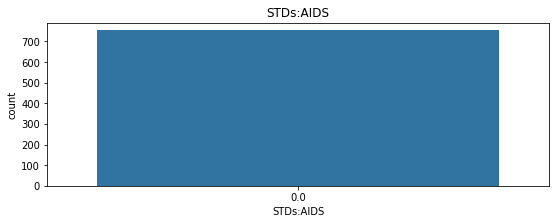

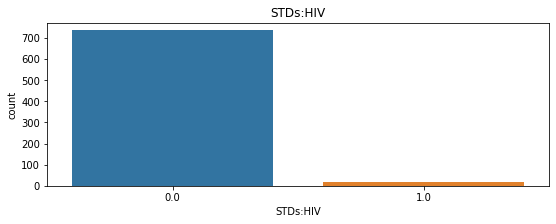

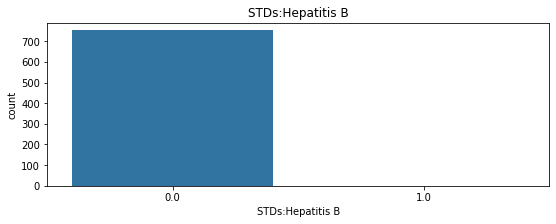

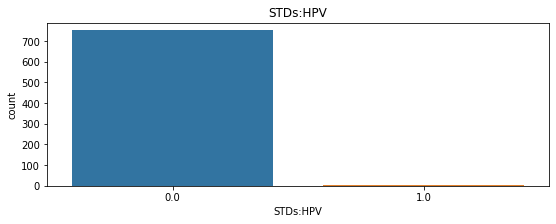

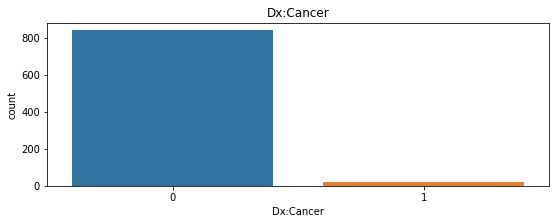

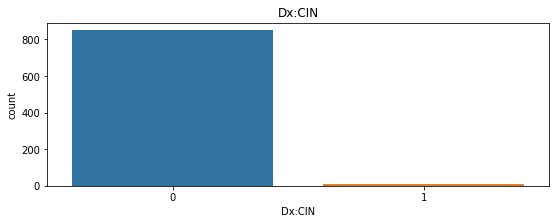

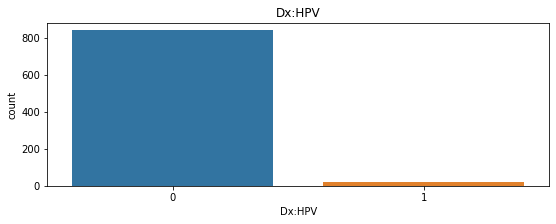

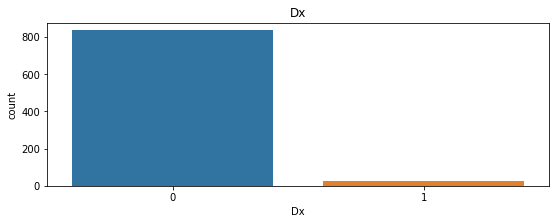

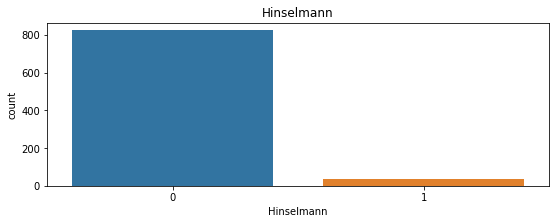

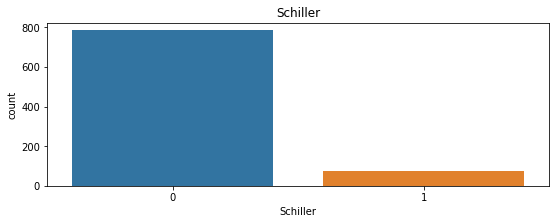

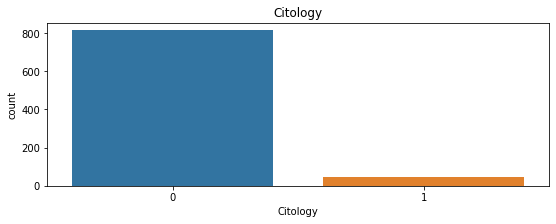

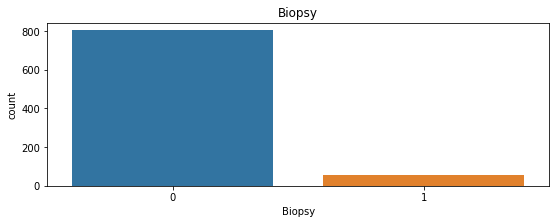

In [57]:
for i in df_obj:
  cat(i)

### 1.11 Splitting the dataset into dependent and independent variables?

In [59]:
print('Dependent variables:')
dep_data =df[['Number of sexual partners','Num of pregnancies','Smokes','Smokes (years)','Smokes (packs/year)','Hormonal Contraceptives',
                     'Hormonal Contraceptives (years)','IUD','IUD (years)','STDs','STDs (number)']]
dep_data.head()

Dependent variables:


,Number of sexual partners,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number)
0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0
4,3.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0


In [60]:
print('Independent variables:')
indep_data = df[['Age','First sexual intercourse','STDs:condylomatosis','STDs:vaginal condylomatosis',
                       'STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:pelvic inflammatory disease',
                        'STDs:genital herpes','STDs:molluscum contagiosum','STDs:HIV','STDs:Hepatitis B',
                       'STDs:HPV','STDs: Number of diagnosis','Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Schiller',
                       'Citology','Biopsy']]
indep_data.head()

Independent variables:


,Age,First sexual intercourse,STDs:condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
1,15,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
2,34,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
3,52,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0
4,46,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0


### 1.12 Splitting the dataset into  training and test set?

In [61]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df1,test_size=0.3,random_state=1)

# The End